<a href="https://colab.research.google.com/github/MartinVIllesca/Ramos-Redes/blob/master/CC7221/tarea1/vggbasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# !unzip './drive/My Drive/dataCC7221/Sketch_EITZ.zip'

In [0]:
import matplotlib as mp
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm
import os
import random
import numpy as np
import matplotlib.pyplot as plt


In [0]:

def read_data_from_file(str_path, dataset = 'train', shuffle = True):
    """
    Funcion que lee las direcciones de las imagenes y entrega los labels y 
    las direcciones como string, tambien
    las revuelve para aleatoriedad.

    Input:
        string_path:    camino a archivos de dataset
        dataset:        especifica train o test
        shuffle:        booleano que especifica si se revuelve el dataset o no
    Output:
        filenames:      caminos en strings a las imagenes en forma de lista
        labels:         labels en forma de strings
    """

    datafile = os.path.join(str_path, dataset + '.txt')
    assert os.path.exists(datafile)

    with open(datafile) as file :
        lines = [line.strip() for line in file]
        if shuffle:
            random.shuffle(lines)
        _lines = [tuple(line.rstrip().split('\t')) for line in lines]
        filenames, labels = zip(*_lines)
        labels = validate_labels(labels)
        filenames = [os.path.join(str_path, line) for line in filenames]

    return filenames, labels

def validate_labels(labels):
    """
    Funcion que valida los labels, deben ser desde 0 a clases-1
    Input:
        labels:     arreglo de string con los labels
    Output:
        labels:     arreglo de enteros con los labels
    """
    new_labels = [int(label) for label in labels]
    label_set = set(new_labels)
    if (len(label_set) == max(label_set) + 1) and (min(label_set) == 0):
        return new_labels
    else:
        raise ValueError("Algunos labels faltan o estan incorrectos en {}".format(label_set))

In [6]:
keras.backend.clear_session()

# se debe crear el dataset
data_dir = './Sketch_EITZ'

real_labels = {}
mapping = './Sketch_EITZ/mapping.txt'
with open(mapping) as file:
    for ln in file:
        arg, label = ln.strip().split('\t')
        real_labels[label] = arg

X_train = []
Z = []
img_size = 256
n_channels = 1
nb_classes = 250

train_images, y_train = read_data_from_file(data_dir, 'train')
test_images, test_labels = read_data_from_file(data_dir, 'test')

print(train_images[10], real_labels[str(y_train[10])])

# train_images, val_images, y_train, y_val = train_test_split(
#         train_images, train_labels, test_size=0.33, random_state=42)

print(train_images[10], real_labels[str(y_train[10])])

a = 'samples\ntrain: {} test: {}\t'
print(a.format(len(train_images), len(test_images)))


./Sketch_EITZ/png_w256/door_handle/5673.png door_handle
./Sketch_EITZ/png_w256/door_handle/5673.png door_handle
samples
train: 16000 test: 4000	


In [0]:
def get_numpy_array(images):
    X = []
    for img in tqdm(images):
        img = plt.imread(img)
        X.append(np.reshape(img, (img_size, img_size, n_channels)))
    X = np.array(X)
    return X

In [8]:
X_train = []
X_test = []

X_train = get_numpy_array(train_images)
X_test = get_numpy_array(test_images)


100%|██████████| 4000/4000 [00:03<00:00, 1259.39it/s]


In [9]:
y_train = np.array(y_train)
y_test = np.array(test_labels)
print(y_train.shape, y_test.shape)


(16000,) (4000,)


In [10]:
print(real_labels)
print(y_train[0])

{'0': 'head', '1': 'human-skeleton', '2': 'chair', '3': 'pretzel', '4': 'shovel', '5': 'leaf', '6': 'parachute', '7': 'house', '8': 'hamburger', '9': 'chandelier', '10': 'tire', '11': 'truck', '12': 'frying-pan', '13': 'lion', '14': 'vase', '15': 'saxophone', '16': 'pen', '17': 'motorbike', '18': 'penguin', '19': 'hammer', '20': 'bush', '21': 'sponge_bob', '22': 'mushroom', '23': 'mouth', '24': 'wheelbarrow', '25': 'seagull', '26': 'cat', '27': 'pigeon', '28': 'cell_phone', '29': 'hat', '30': 'bulldozer', '31': 'toothbrush', '32': 'telephone', '33': 'binoculars', '34': 'flashlight', '35': 'paper_clip', '36': 'van', '37': 'camera', '38': 'crane_machine', '39': 'bee', '40': 'submarine', '41': 'flower_with_stem', '42': 'santa_claus', '43': 'screwdriver', '44': 'comb', '45': 'angel', '46': 'cake', '47': 'cigarette', '48': 'satellite_dish', '49': 'camel', '50': 'backpack', '51': 'bear_animal', '52': 'frog', '53': 'axe', '54': 'ladder', '55': 'wheel', '56': 'mailbox', '57': 'cup', '58': 'lob

123


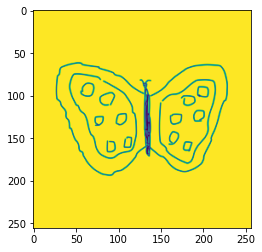

butterfly


In [12]:
n = 1000
print(y_train[n])
plt.imshow(X_train[n].reshape((img_size,img_size)))
plt.show()
print(real_labels[str(y_train[n])])


In [0]:
def vgg_block(x, n_neurons):
  # bloque vgg
  for i in range(4):
      x = layers.Conv2D(n_neurons, (3,3), padding='same',
                        kernel_initializer='he_normal')(x)
      x = layers.BatchNormalization()(x)
      x = layers.ReLU()(x)      
  return x

In [0]:
inputs = keras.Input(shape=(img_size, img_size, n_channels))

x = layers.Conv2D(64, (3,3), padding='same', strides=2,
                  kernel_initializer='he_normal')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = vgg_block(x, 64)
x = layers.MaxPool2D(pool_size=(3, 3), strides=2, padding='valid')(x)
# x = layers.Dropout(rate=0.5)(x)

x = vgg_block(x, 64)
x = layers.MaxPool2D(pool_size=(3, 3), strides=2, padding='valid')(x)
# x = layers.Dropout(rate=0.5)(x)

x = vgg_block(x, 128)
x = layers.MaxPool2D(pool_size=(3, 3), strides=2, padding='valid')(x)
# x = layers.Dropout(rate=0.5)(x)

x = vgg_block(x, 128)
x = layers.MaxPool2D(pool_size=(3, 3), strides=2, padding='valid')(x)
# x = layers.Dropout(rate=0.5)(x)

x = vgg_block(x, 256)
x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dropout(rate=0.2)(x)

# x = layers.BatchNormalization()(x)
x = layers.Dense(250)(x)

model = keras.Model(inputs, x, name='BasicVGG')


In [15]:
print(model.summary())

Model: "BasicVGG"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
re_lu (ReLU)                 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128, 128, 64)      0  

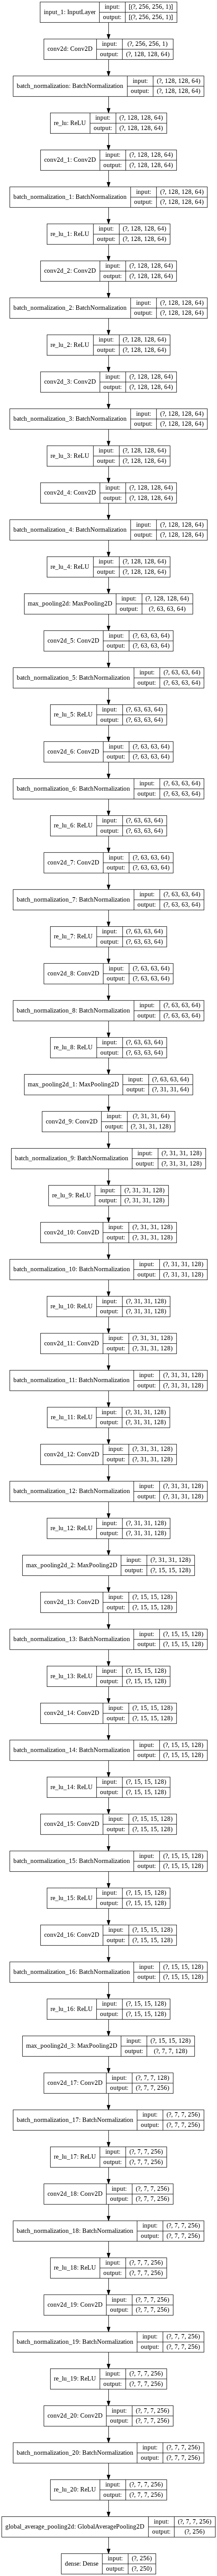

In [16]:
keras.utils.plot_model(model, './BasicVGG.png', show_shapes=True, expand_nested=True)

In [0]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
print(y_train.shape, X_train.shape)

(16000,) (16000, 256, 256, 1)


In [0]:
# new_model = keras.models.load_model('./drive/My Drive/dataCC7221/model.50-4.91.h5')

In [0]:
# new_model.summary()

In [0]:
# loss, acc = new_model.evaluate(X_test, y_test, verbose=2)
# print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

In [0]:
# callbacks
callbacks = [
    keras.callbacks.EarlyStopping(patience=10),
    keras.callbacks.ModelCheckpoint(filepath='drive/My Drive/dataCC7221/modelVGGBasic12/model.{epoch:02d}-{val_loss:.2f}.h5',
                                    save_best_only=True),
    keras.callbacks.TensorBoard(log_dir='./drive/My Drive/dataCC7221/modelVGGBasic12/logs')
]

In [22]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    validation_batch_size=32,
                    callbacks=callbacks)

Epoch 1/100
500/500 [==============================] - 308s 616ms/step - loss: 4.2748 - accuracy: 0.0922 - val_loss: 7.4833 - val_accuracy: 0.0362
Epoch 2/100
500/500 [==============================] - 307s 614ms/step - loss: 3.3788 - accuracy: 0.2276 - val_loss: 3.5987 - val_accuracy: 0.2010
Epoch 3/100
500/500 [==============================] - 307s 613ms/step - loss: 2.7245 - accuracy: 0.3506 - val_loss: 3.3631 - val_accuracy: 0.2457
Epoch 4/100
500/500 [==============================] - 307s 613ms/step - loss: 2.2619 - accuracy: 0.4438 - val_loss: 2.9143 - val_accuracy: 0.3228
Epoch 5/100
500/500 [==============================] - 306s 612ms/step - loss: 1.9164 - accuracy: 0.5115 - val_loss: 4.2400 - val_accuracy: 0.2208
Epoch 6/100
500/500 [==============================] - 307s 614ms/step - loss: 1.6515 - accuracy: 0.5696 - val_loss: 2.1837 - val_accuracy: 0.4740
Epoch 7/100
500/500 [==============================] - 307s 613ms/step - loss: 1.4180 - accuracy: 0.6212 - val_loss: 2

In [0]:
# best_model = keras.models.load_model('./drive/My Drive/dataCC7221/modelVGGBasic/model.08-2.18.h5')
# loss, acc = best_model.evaluate(X_test, y_test, batch_size=32)
# print('acc: {:.3f}\t loss: {:.3f}'.format(acc, loss))
# loss, acc = model.evaluate(X_test, y_test, batch_size=32)
# print('acc: {:.3f}\t loss: {:.3f}'.format(acc, loss))

125/125 [==============================] - 4s 33ms/step - loss: 3.4919 - accuracy: 0.5872
acc: 0.587	 loss: 3.492


In [0]:
# save history
import pickle
with open('./drive/My Drive/dataCC7221/trainHistoryDict_vgg_def', 'wb') as file_pi:
  pickle.dump(history.history, file_pi)

In [0]:
# !mkdir './drive/My Drive/data7221/saved_model/'
# model.save('./drive/My Drive/data7221/saved_model/')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


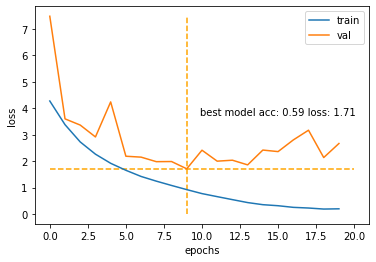

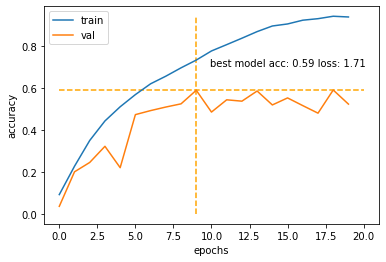

In [70]:
print(history.history.keys())
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.ylabel('loss'), plt.xlabel('epochs')
a = np.where(np.min(history.history['val_loss']) == history.history['val_loss'])[0][0]
plt.vlines(a, ymin=0, ymax=max(history.history['val_loss']), color='orange',
           linestyles='dashed')
plt.hlines(history.history['val_loss'][a], xmin=0, xmax=len(history.history['accuracy']), color='orange',
           linestyles='dashed')
plt.text(a*1.1,
         y=max(history.history['val_loss'])*0.5,
         s='best model acc: {:.2f} loss: {:.2f}'.format(history.history['val_accuracy'][a],
                                                        history.history['val_loss'][a]))
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.ylabel('accuracy'), plt.xlabel('epochs')
plt.vlines(a, ymin=0, ymax=max(history.history['accuracy']), color='orange',
           linestyles='dashed')
plt.hlines(history.history['val_accuracy'][a], xmin=0, xmax=len(history.history['accuracy']), color='orange',
           linestyles='dashed')
plt.text(a*1.1,
         y=max(history.history['accuracy'])*0.75,
         s='best model acc: {:.2f} loss: {:.2f}'.format(history.history['val_accuracy'][a],
                                                        history.history['val_loss'][a]))
plt.legend()
plt.show()